In [1]:
%load_ext autoreload

In [6]:
%autoreload

# to display progress of lengthy calculations
from IPython.display import clear_output

import numpy as np
from matplotlib import pyplot as plt

from two048.game import Game, init_randomness
from two048.model import Model
import agent, policy

In [12]:
def evaluate_policy(policy, games_num, info, **kwargs):
    # TODO signature description
    score = np.empty(games_num, dtype=int)
    largest_tile = np.empty(games_num, dtype=int)
    move_count = np.empty(games_num, dtype=int)

    for i in range(games_num):
        clear_output(wait=True)
        game = Game(**kwargs)
        model = Model()
        while not game.is_finished():
            agent.interact(policy, game, model)
        score[i] = game.get_value()
        largest_tile[i] = max(game.get_state())
        move_count[i] = len(model.trajectory)
        print("{}: {}% finished".format(info, np.round((i + 1)/games_num * 100)))
    return score, largest_tile, move_count

In [8]:
def visualize_results(data, title=None):
    # data format:
    #   sequence of tuples of (y values array, y label, average y value, average y value that is shown in legend)
    plots_num = len(data)
    fig, axes_instances = plt.subplots(nrows=plots_num, ncols=1, figsize=(12, 3 * plots_num))
    
    if title is not None:
        # add and adjust figure title
        fig.suptitle(title, fontsize=16)
        fig.tight_layout()
        fig.subplots_adjust(top=0.93)
    
    for index, (y, y_label, average_value, display_value) in enumerate(data):
        axes = axes_instances[index]
        axes.set(ylabel=y_label)
        axes.plot(y, ".")
        axes.axhline(y=average_value, color="red", linestyle="--", label="average: {}".format(display_value))
        axes.legend(loc="upper right")

In [13]:
# establish the baseline with random policy

random_policy = policy.Random()

score, largest_tile, move_count = evaluate_policy(random_policy, 1000, "random baseline")

random baseline: 100.0% finished


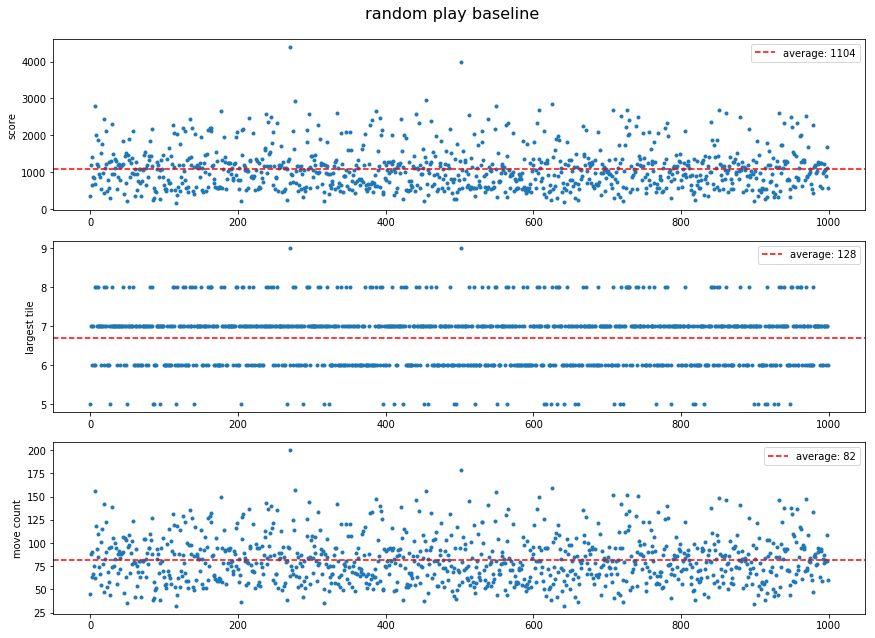

In [14]:
mean_score = np.mean(score)
mean_tile = np.mean(largest_tile)
mean_moves = np.mean(move_count)

visualize_results([(score, "score", mean_score, int(np.round(mean_score))),
                   (largest_tile, "largest tile", mean_tile, pow(2, int(np.round(mean_tile)))),
                   (move_count, "move count", mean_moves, int(np.round(mean_moves)))],
                  title="random play baseline")

In [31]:
# random policy with threes scoring

score, largest_tile, move_count = evaluate_policy(random_policy, 1000, "random baseline (threes scoring)", scoring="threes")

random baseline (threes scoring): 100.0% finished


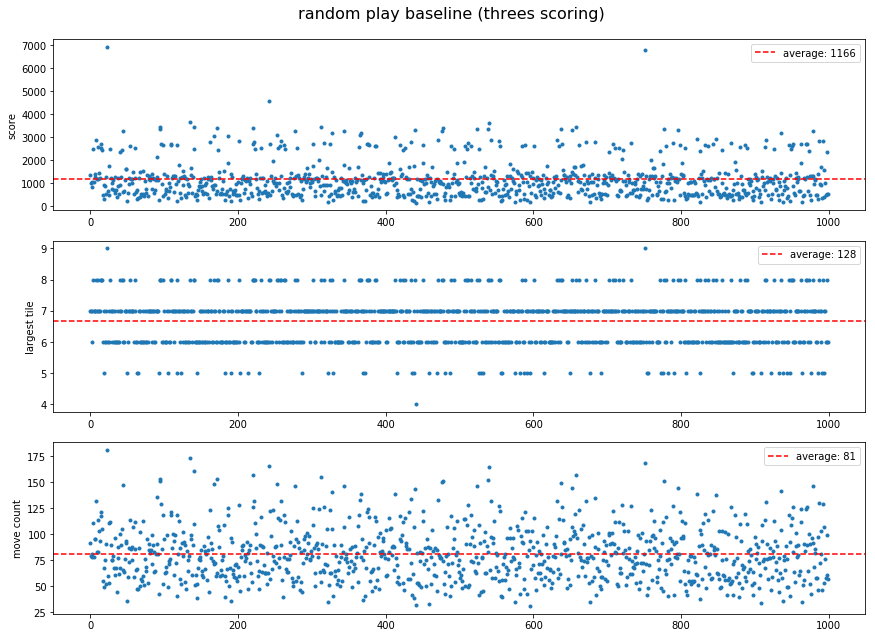

In [33]:
mean_score = np.mean(score)
mean_tile = np.mean(largest_tile)
mean_moves = np.mean(move_count)

visualize_results([(score, "score", mean_score, int(np.round(mean_score))),
                   (largest_tile, "largest tile", mean_tile, pow(2, int(np.round(mean_tile)))),
                   (move_count, "move count", mean_moves, int(np.round(mean_moves)))],
                  title="random play baseline (threes scoring)")

In [34]:
# pure MCTS policy
# to determine the next move from a game state:
#   * for each possible action simulate a number of playout games with random policy
#   * the best action is the action with the largest average score of the playout samples
#     (ties are broken randomly)
#
# https://en.wikipedia.org/wiki/Monte_Carlo_tree_search#Pure_Monte_Carlo_game_search

pure_mcts_policy = policy.PureMCTS()  # default playout samples number is 128

In [ ]:
score, largest_tile, move_count = evaluate_policy(pure_mcts_policy, 100, "pure MCTS (2048 scoring)")

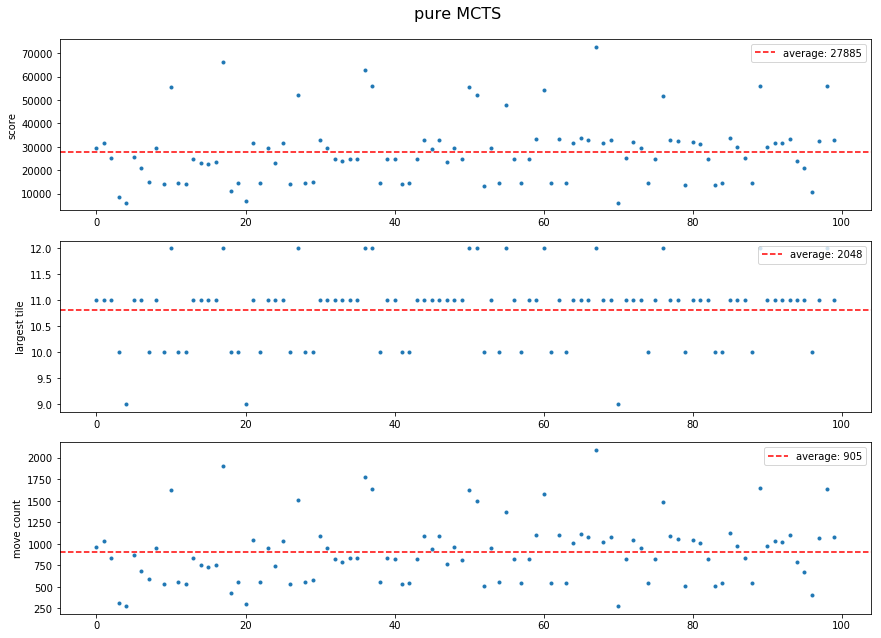

In [58]:
mean_score = np.mean(score)
mean_tile = np.mean(largest_tile)
mean_moves = np.mean(move_count)


visualize_results([(score, "score", mean_score, int(np.round(mean_score))),
                   (largest_tile, "largest tile", mean_tile, pow(2, int(np.round(mean_tile)))),
                   (move_count, "move count", mean_moves, int(np.round(mean_moves)))],
                  title="pure MCTS")

In [36]:
# pure MCTS with threes scoring

score, largest_tile, move_count = evaluate_policy(pure_mcts_policy, 100, "pure MCTS (threes scoring)", scoring="threes")

pure MCTS (threes scoring): 100.0% finished


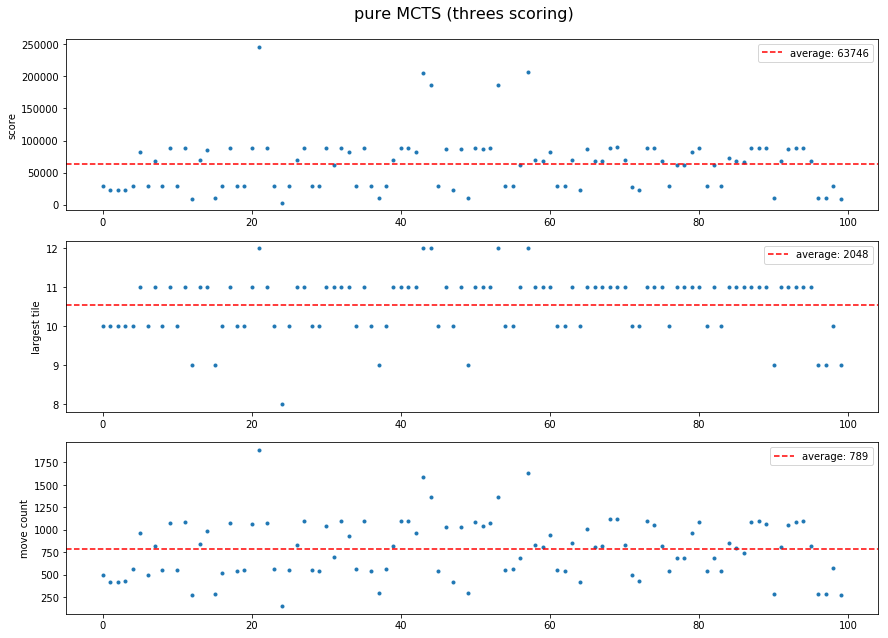

In [37]:
mean_score = np.mean(score)
mean_tile = np.mean(largest_tile)
mean_moves = np.mean(move_count)


visualize_results([(score, "score", mean_score, int(np.round(mean_score))),
                   (largest_tile, "largest tile", mean_tile, pow(2, int(np.round(mean_tile)))),
                   (move_count, "move count", mean_moves, int(np.round(mean_moves)))],
                  title="pure MCTS (threes scoring)")